In [1]:
from traceback import print_tb

from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import poisson

In [2]:
def read_data(name):
    return pd.read_csv(name)
    
def plot_events_repetition(events_data):
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'serif'
    
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
    ax.plot(events_data, color='black', linewidth=1.5, label="Events")
    ax.set_xlabel("Numero de mediciones", fontsize=14)
    ax.set_ylabel("Numero de eventos registrados", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlim([0, len(events_data)])
    ax.set_ylim([0, events_data.max()+1])
    ax.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()
    
def plot_events_histogram(events_data):
    min_val = 0
    max_val = events_data.max() + 1
    bins = np.arange(min_val, max_val, 1)
    histogram = [0] * len(bins)
    for i in bins:
        histogram[i] = len(events_data[events_data == i])
    hist_values = np.array(histogram) / sum(histogram)
    bin_centers = bins
    def poisson_pmf(k, lamb):
        return poisson.pmf(k, lamb)
    params, cov_matrix = curve_fit(poisson_pmf, bin_centers, hist_values, p0=[np.mean(events_data)])
    lambda_fit = params[0]
    
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'serif'
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
    plt.bar(bins, hist_values, color='black', alpha=0.7, edgecolor='black', linewidth=1.5)
    plt.plot(bins, poisson_pmf(bins, lambda_fit), 'r-', lw=2, label=f'Ajuste Poisson\nlambda = {lambda_fit:3f}')
    ax.set_xlabel("Numero de eventos registrados", fontsize=14)
    ax.set_ylabel("Frecuencia", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_signal(signal_data, title, x_label, y_label, peaks=None, margin=0.1):
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'serif'

    fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
    ax.plot(signal_data['time'], signal_data['signal'] / 10, color='black', linewidth=0.5, label="Signal")
    if peaks is not None:
        ax.scatter(signal_data['time'][peaks], signal_data['signal'][peaks]/10, color='red', s=50, label="Peaks")

    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax.set_xlim([0, signal_data['time'].max()])
    ax.set_ylim([signal_data['signal'].min()/10 - margin, signal_data['signal'].max()/10 + margin])
    ax.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()


Mean events per second for intensity 0: 29150.000000000004
Laser power before ND filter: 2.530000e-05 W
Laser power after ND filter: 8.000562e-10 W
Laser energy: 8.000562e-10 J
Photon energy: 3.736466e-19 J
Photon number: 2.141211e+09 photons/s

Mean events per second for intensity 1: 47692.85714285714
Laser power before ND filter: 2.740000e-05 W
Laser power after ND filter: 8.664641e-10 W
Laser energy: 8.664641e-10 J
Photon energy: 3.736466e-19 J
Photon number: 2.318940e+09 photons/s

Mean events per second for intensity 2: 62334.28571428572
Laser power before ND filter: 2.920000e-05 W
Laser power after ND filter: 9.233851e-10 W
Laser energy: 9.233851e-10 J
Photon energy: 3.736466e-19 J
Photon number: 2.471279e+09 photons/s

Mean events per second for intensity 3: 84701.42857142857
Laser power before ND filter: 3.520000e-05 W
Laser power after ND filter: 1.113122e-09 W
Laser energy: 1.113122e-09 J
Photon energy: 3.736466e-19 J
Photon number: 2.979076e+09 photons/s

Mean events per sec

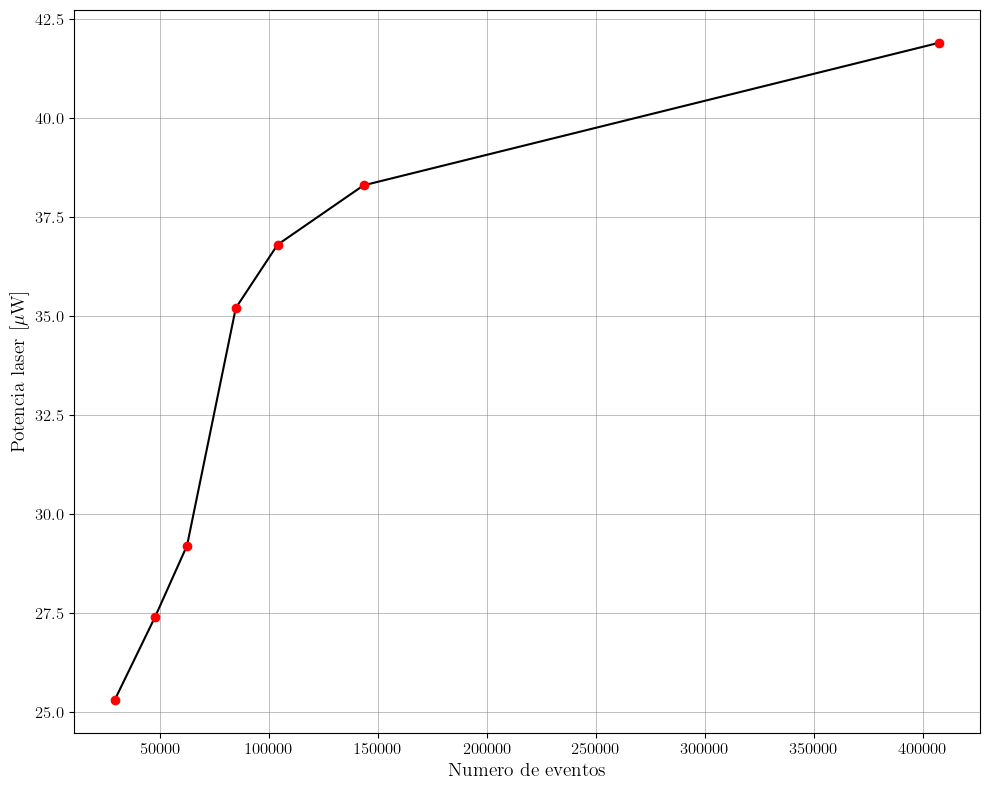

In [3]:
def format_name_constant(intensity, i):
    if i == 0:
        return f"laser-constante-{intensity}.csv"
    else:
        return f"laser-constante-{intensity}_{i}.csv"
    
def get_mean_events_constant(intensity):
    path = f"measures/constant/buenas/"
    mean_events = []
    for i in range(2):
        file_name = path + format_name_constant(intensity, i)
        data = read_data(file_name)
        mean_events.append(data['events'].mean())
                           
    return mean_events

def laser_power_to_photon_number(laser_power, wavelength, nd_filter):
    h = 6.626e-34   # Planck's constant in J*s
    c = 3.0e8       # Speed of light in m/s
    
    laser_power_final = laser_power * 10**(-nd_filter)
    laser_energy = laser_power_final * 1.0 # 1 second
    photon_energy = (h * c) / wavelength
    photon_number = (laser_energy / photon_energy)
    
    print(f"Laser power before ND filter: {laser_power:2e} W")
    print(f"Laser power after ND filter: {laser_power_final:2e} W")
    print(f"Laser energy: {laser_energy:2e} J")
    print(f"Photon energy: {photon_energy:2e} J")
    print(f"Photon number: {photon_number:2e} photons/s")
    
def microwatts_to_watts(microwatts):
    return microwatts * 1e-6 # Watts o J/s

laser_wavelength = 5.32e-7     # Meters    
laser_intensities = [0, 1, 2, 3, 4, 5, 6]
oscilloscope_time_window = 0.0007 # Seconds

laser_intensities_microwatts = {
    "0": 25.3,
    "1": 27.4,
    "2": 29.2,
    "3": 35.2,
    "4": 36.8,
    "5": 38.3,
    "6": 41.9
}
detector_intensities_counts = {
    "0": 0,
    "1": 0,
    "2": 0,
    "3": 0,
    "4": 0,
    "5": 0,
    "6": 0
}

for intensity in laser_intensities:
    mean_list = get_mean_events_constant(intensity)
    mean_value = np.mean(mean_list)
    
    detector_intensities_counts[str(intensity)] = mean_value / oscilloscope_time_window
    print(f"Mean events per second for intensity {intensity}: {detector_intensities_counts[str(intensity)]}")
    laser_power = microwatts_to_watts(laser_intensities_microwatts[str(intensity)])
    laser_power_to_photon_number(laser_power, laser_wavelength, 4.5)
    print()


plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
fig, ax = plt.subplots(figsize=(10, 8), facecolor='white')
ax.plot(list(detector_intensities_counts.values()), list(laser_intensities_microwatts.values()), color='black', linewidth=1.5)
ax.plot(list(detector_intensities_counts.values()), list(laser_intensities_microwatts.values()), 'ro')
ax.set_ylabel("Potencia laser [$\\mu$W]", fontsize=14)
ax.set_xlabel("Numero de eventos", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



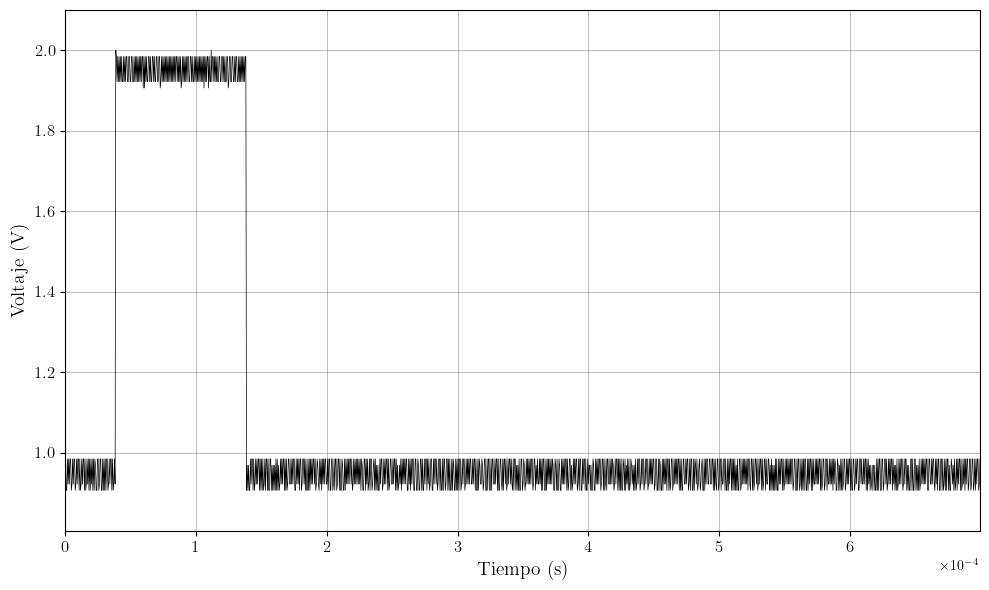

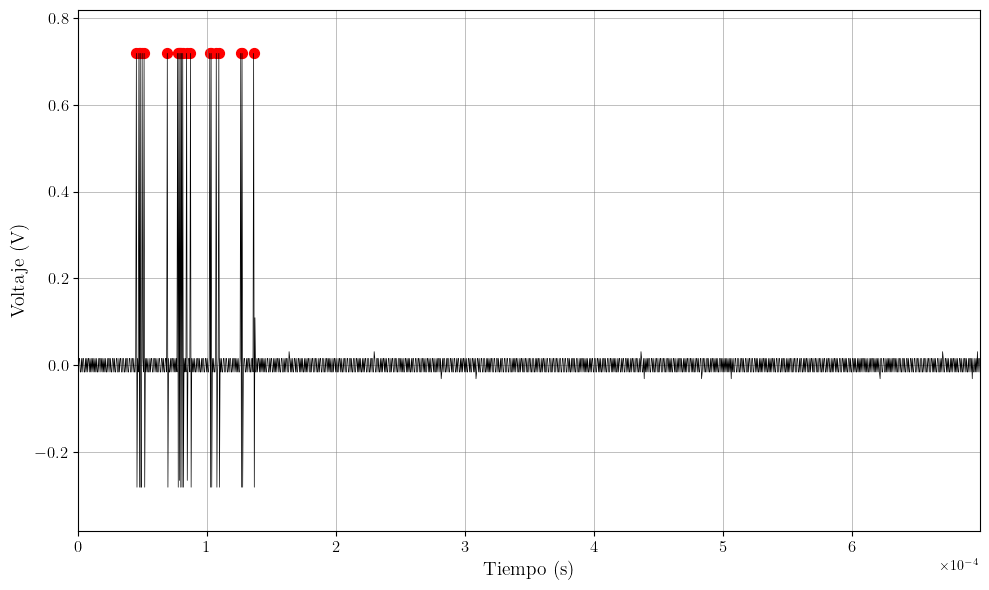

20


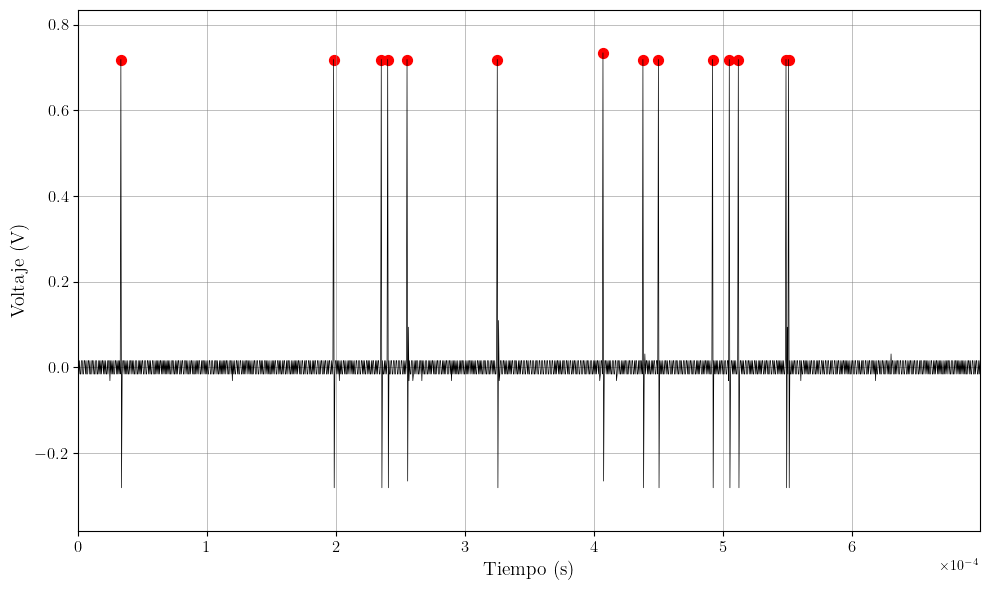

14


In [4]:
from scipy.signal import find_peaks

data_trigger = read_data('measures/constant/ts-pulso_trigger.csv')
plot_signal(data_trigger, "Trigger", "Tiempo (s)", "Voltaje (V)", margin=0.1)

data_events = read_data('measures/constant/ts-pulso-1_1.csv')
picks_data_events, _ = find_peaks(data_events['signal'], height=2, distance=2)
plot_signal(data_events, "Pulso", "Tiempo (s)", "Voltaje (V)", margin=0.1, peaks=picks_data_events)
print(len(picks_data_events))

data_picks_events = read_data('measures/constant/prev/single_event_pick-constante-1.csv')
picks_data_events_picks, _ = find_peaks(data_picks_events['signal'], height=2, distance=2)
plot_signal(data_picks_events, "Pulso", "Tiempo (s)", "Voltaje (V)", margin=0.1, peaks=picks_data_events_picks)
print(len(picks_data_events_picks))





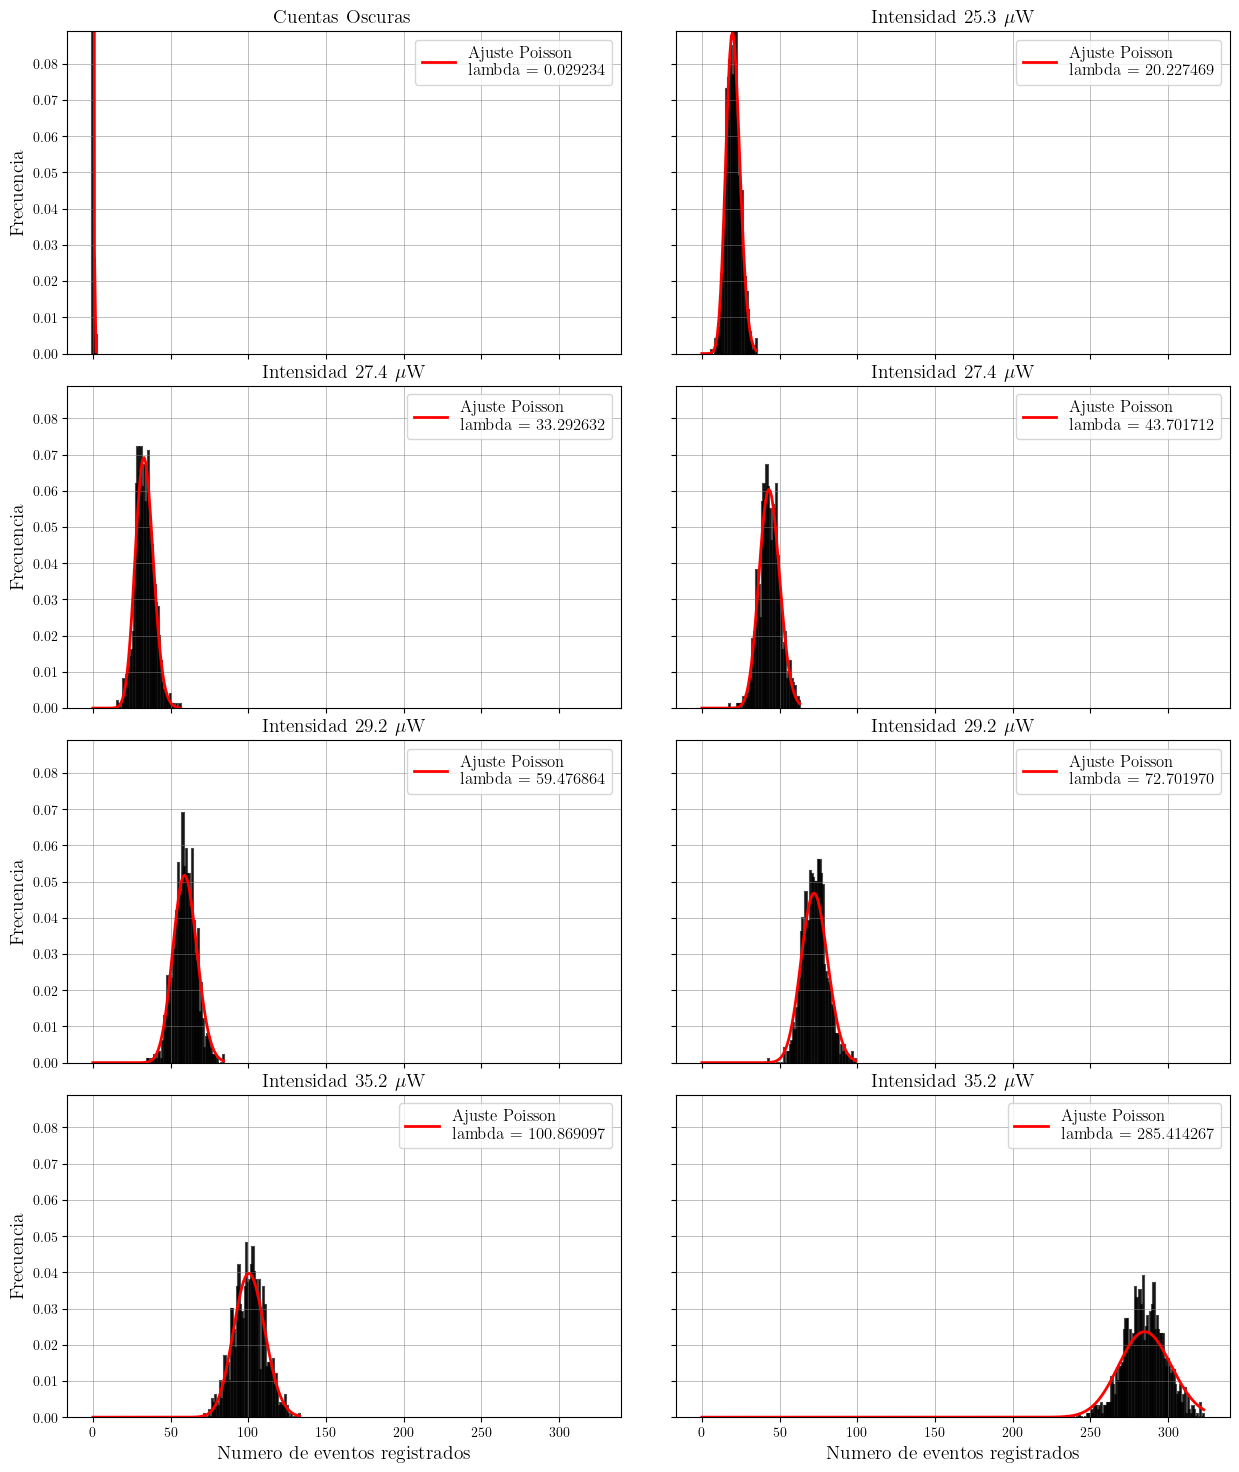

In [5]:
# Crear una figura y un conjunto de subgráficas
fig, axs = plt.subplots(4, 2, figsize=(15, 18), sharex=True, sharey=True)  # 8 filas, 2 columnas
fig.subplots_adjust(hspace=0.1, wspace=0.1) # Reducido el espaciado vertical entre subgráficas

path = f"measures/constant/buenas/"
def get_data_constant_name(i):
    return path + format_name_constant(i, 0)

indice_global = 0
# Generar y graficar datos en cada subgráfica
for i in range(4):
    for j in range(2):
        file_name = ""
        title = ""
        if i == 0 and j == 0:
            file_name = path + "cuentas_oscuras.csv"
            title = "Cuentas Oscuras"
        else:
            file_name = get_data_constant_name(indice_global)            
            intensidad_valor = laser_intensities_microwatts[str(i)]
            title = f"Intensidad {intensidad_valor} $\\mu$W"
            indice_global += 1

            
        data = read_data(file_name)
        events_data = data['events']
        
        min_val = 0
        max_val = events_data.max() + 1
        bins = np.arange(min_val, max_val, 1)
        histogram = [0] * len(bins)
        for l in bins:
            histogram[l] = len(events_data[events_data == l])
        hist_values = np.array(histogram) / sum(histogram)
        bin_centers = bins
        def poisson_pmf(k, lamb):
            return poisson.pmf(k, lamb)
        params, cov_matrix = curve_fit(poisson_pmf, bin_centers, hist_values, p0=[np.mean(events_data)])
        lambda_fit = params[0]
        plt.rcParams['text.usetex'] = True
        plt.rcParams['font.family'] = 'serif'
        axs[i, j].bar(bins, hist_values, color='black', alpha=0.7, edgecolor='black', linewidth=1.5)
        axs[i, j].plot(bins, poisson_pmf(bins, lambda_fit), 'r-', lw=2, label=f'Ajuste Poisson\nlambda = {lambda_fit:3f}')
        axs[i, j].tick_params(axis='both', which='major', labelsize=10)
        axs[i, j].grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.7)
        axs[i, j].legend(fontsize=12)
        axs[i, j].set_title(title, fontsize=14)
        axs[i, j].set_ylim([0, hist_values.max() + 0.05])
        
        
# Configurar los ejes compartidos
for ax in axs[-1]:  # Para el último fila
    ax.set_xlabel("Numero de eventos registrados", fontsize=14)

for ax in axs[:, 0]:  # Para la primera columna
    ax.set_ylabel("Frecuencia", fontsize=14)

plt.show()

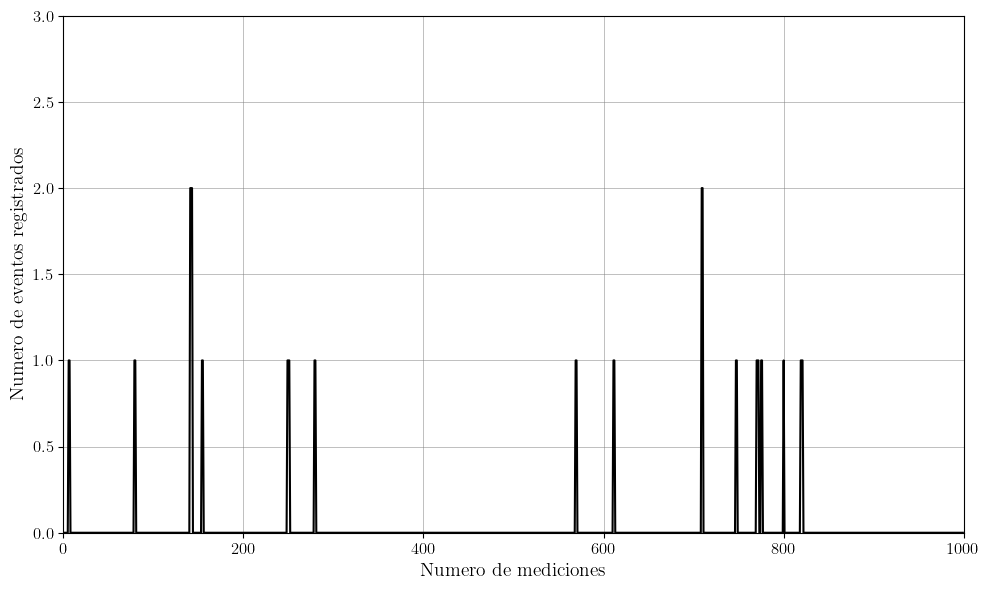

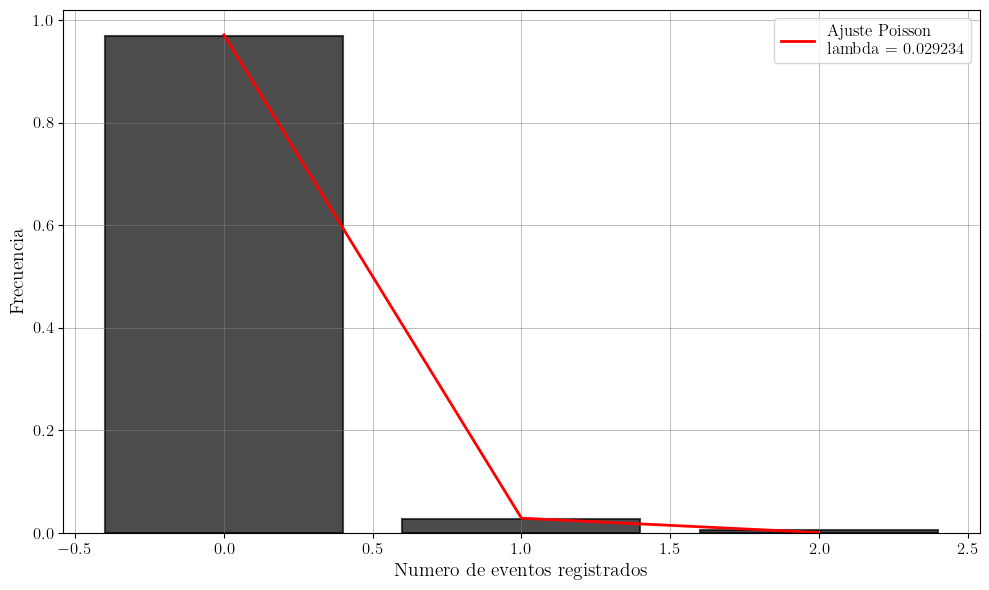

In [6]:
file_name = 'measures/constant/buenas/cuentas_oscuras.csv'
data = read_data(file_name)
events = data['events']

plot_events_repetition(events)
plot_events_histogram(events)
